# Analítica Avanzada con Apache Spark 
* Diego Andrés Alonzo Medinilla

In [1]:
%pip install findspark
%pip install pyspark

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import findspark
findspark.init()

import pandas as pd
import pyspark
from pyspark.sql import SparkSession

In [5]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local[16]")\
        .appName('PySpark_AdvancedAnalitic')\
        .getOrCreate()

sc = spark.sparkContext.getOrCreate()

In [130]:
from pyspark.sql.types import *

data_schema = [
               StructField('_c0', IntegerType(), True),
               StructField('symbol', StringType(), True),
               StructField('data', DateType(), True),
               StructField('open', DoubleType(), True),
               StructField('high', DoubleType(), True),
               StructField('low', DoubleType(), True),
               StructField('close', DoubleType(), True),
               StructField('volume', IntegerType(), True),
               StructField('adjusted', DoubleType(), True),
               StructField('market.cap', StringType(), True),
               StructField('sector', StringType(), True),
               StructField('industry', StringType(), True),
               StructField('exchange', StringType(), True),
            ]

final_struc = StructType(fields=data_schema)
data = spark.read.csv(
    'data/stocks_price_final.csv',
    sep = ',',
    header = True,
    schema = final_struc
    )
data = data.drop('market.cap')
data.na.drop()
data_df = data.select(['industry', 'open', 'close', 'adjusted']).groupBy('industry').mean().toPandas()
data_df

import seaborn as sb
corr = data_df.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

ValueError: could not convert string to float: 'Finance/Investors Services'

In [7]:
## Importa el csv de "data/stock_price_final.csv"
## Visualiza los datos
df = spark.read.csv("./data/stocks_price_final.csv",sep=",", header=True, inferSchema=True)
df.show()

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      date|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|       54|       58|       51|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|       56|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

In [14]:
# Renombrar columna market recap
df2 = df.withColumnRenamed("market.cap", "market_capitalization")

In [15]:
df2.show()

+---+------+----------+---------+---------+---------+---------+-------+---------+---------------------+-------------+--------------------+--------+
|_c0|symbol|      date|     open|     high|      low|    close| volume| adjusted|market_capitalization|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+---------------------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|       54|       58|       51|    52.75|7326300|    52.75|               $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|               $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|       56|52.009998|55.200001| 269900|55.200001|               $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|               $9.31B|Capital G

In [18]:
# Eliminar la variable market.cap
df3 = df.drop("market.cap")
df3.show()

+---+------+----------+---------+---------+---------+---------+-------+---------+-------------+--------------------+--------+
|_c0|symbol|      date|     open|     high|      low|    close| volume| adjusted|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|       54|       58|       51|    52.75|7326300|    52.75|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|       56|52.009998|55.200001| 269900|55.200001|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.27|55.650002|       62|1589600|       62|Capital Goods|Biotechnology: La...|  

In [19]:
# En caso de querer borrar múltiples columnas
df4 = df.drop("market.cap", "low")
df4.show()

+---+------+----------+---------+---------+---------+-------+---------+-------------+--------------------+--------+
|_c0|symbol|      date|     open|     high|    close| volume| adjusted|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+-------+---------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|       54|       58|    52.75|7326300|    52.75|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|    52.27|1025200|    52.27|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|       56|55.200001| 269900|55.200001|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|56.779999| 602800|56.779999|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.27|       62|1589600|       62|Capital Goods|Biotechnology: La...|  NASDAQ|
|  6|   TXG|2019-09-19|62.810001|   63.375|61.119999| 425200|61.119999|C

In [21]:
df5 = df.filter(df.open !="Nan")
df5.show()

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      date|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|       54|       58|       51|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|       56|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

In [22]:
df6 = df.dropna(subset="open")
df6.show()

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      date|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|       54|       58|       51|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|       56|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

In [32]:
# Calcular minimo y maximo de data, open, close y adjusted
df.describe(["date", "open", "close", "adjusted"]).show()

+-------+------------------+------------------+------------------+
|summary|              open|             close|          adjusted|
+-------+------------------+------------------+------------------+
|  count|           1729034|           1729034|           1729034|
|   mean|15070.071703341051| 15032.71485433071|14926.109688795501|
| stddev|1111821.8002863203|1109755.9294000624|1101877.6328940126|
|    min|             0.072|             0.071|         -0.388907|
|    max|                NA|                NA|                NA|
+-------+------------------+------------------+------------------+



In [76]:
from pyspark.sql.functions import min, max
# df.select(["date", "open", "close", "adjusted"]).groupBy("sector").mean().show()
# df.select(["open", "close", "adjusted","sector"]).groupBy(["open", "close", "adjusted","sector"]).mean().show(5000)
# df.groupBy("sector")\
df.agg(
        min("date").alias("date_min"),
        max("date").alias("date_max"),
        min("open").alias("open_min"),
        max("open").alias("open_max"),
        min("close").alias("close_min"),
        max("close").alias("close_max"),
        min("adjusted").alias("adjusted_min"),
        max("adjusted").alias("adjusted_max")
        ).show()

+----------+----------+--------+--------+---------+---------+------------+------------+
|  date_min|  date_max|open_min|open_max|close_min|close_max|adjusted_min|adjusted_max|
+----------+----------+--------+--------+---------+---------+------------+------------+
|2019-01-02|2020-07-22|   0.072|      NA|    0.071|       NA|   -0.388907|          NA|
+----------+----------+--------+--------+---------+---------+------------+------------+



In [73]:
# Convertir un dataframe de spark a un dataframe de pandas a lo rex
import pyspark.pandas as ps

panda = df.toPandas()

In [79]:

from pyspark.sql.functions import avg
# Calcular la media de open, close y adjusted por industria
df.groupBy("industry").\
    agg(
        avg("open").alias("media_open"),
        avg("close").alias("media_close"),
        avg("adjusted").alias("media_adjusted"),
        ).show(truncate= False)

+-------------------------------------------------------------+------------------+------------------+------------------+
|industry                                                     |media_open        |media_close       |media_adjusted    |
+-------------------------------------------------------------+------------------+------------------+------------------+
|Finance/Investors Services                                   |5.134401785714288 |5.136630739795919 |4.991354066964286 |
|Miscellaneous                                                |16.38588266938775 |16.359879090306126|16.148959322959186|
|Biotechnology: Biological Products (No Diagnostic Substances)|24.80808319232426 |24.803587149935417|24.74507997827317 |
|Other Specialty Stores                                       |84.80718810562857 |84.8027655092983  |84.55525036482354 |
|Biotechnology: Electromedical & Electrotherapeutic Apparatus |33.36891734535046 |33.33611913546896 |33.21022605613575 |
|Other Consumer Services        

In [89]:
# Obtener un grafico de lineas de la media por industria
media = df.groupBy("industry").agg(avg("open").alias("media"))
media.show()

+--------------------+------------------+
|            industry|             media|
+--------------------+------------------+
|Finance/Investors...| 5.134401785714288|
|       Miscellaneous| 16.38588266938775|
|Biotechnology: Bi...| 24.80808319232426|
|Other Specialty S...| 84.80718810562857|
|Biotechnology: El...| 33.36891734535046|
|Other Consumer Se...| 43.67010744224604|
|Electric Utilitie...| 41.35569183903102|
|        Water Supply| 40.58048308203543|
|               Banks| 21.44122960768001|
|Farming/Seeds/Mil...|27.740143444117308|
|Medical/Nursing S...| 71.03728952880785|
|Biotechnology: La...|102.15234116744072|
| Television Services|119.26427651044699|
|Automotive Afterm...| 55.44373699841821|
|   Auto Parts:O.E.M.| 36.21274350933919|
|Rental/Leasing Co...| 79.74401194175172|
|Medical Specialities| 55.37061249376796|
| Specialty Chemicals| 37.89684115405884|
|Computer peripher...|36.966080751275506|
|Computer Software...| 94.37467461543862|
+--------------------+------------

In [90]:
media_pandas = media.toPandas()
print(media_pandas)

                                              industry      media
0                           Finance/Investors Services   5.134402
1                                        Miscellaneous  16.385883
2    Biotechnology: Biological Products (No Diagnos...  24.808083
3                               Other Specialty Stores  84.807188
4    Biotechnology: Electromedical & Electrotherape...  33.368917
..                                                 ...        ...
130                             Wholesale Distributors  16.608839
131                           Electronics Distribution   6.428699
132                                     Tools/Hardware  70.412755
133                                            Tobacco  32.467832
134    General Bldg Contractors - Nonresidential Bldgs  13.528546

[135 rows x 2 columns]


In [85]:
%pip install matplotlib
%pip install numpy


Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='industry'>

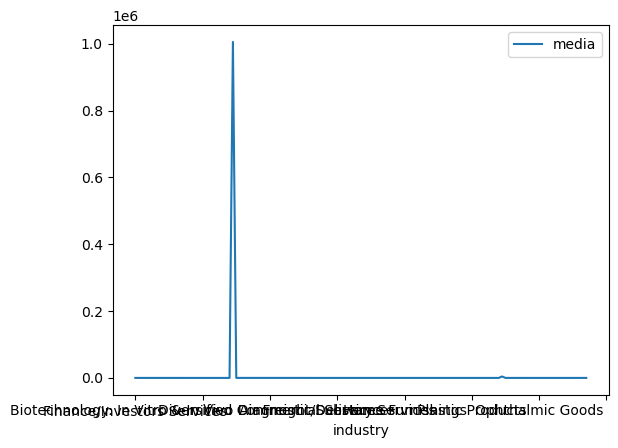

In [91]:
media_pandas.plot(x="industry", y="media", kind="line") 

In [92]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [124]:
# Heatmap correlacion de medias
# from pyspark.ml.stat import Correlation
# cor = df.groupBy("industry").agg(
#     avg("open").alias("media_open"),
#     avg("close").alias("media_close"),
#     avg("adjusted").alias("media_adjusted")
# ).toPandas()
# cor = df.select("industry", "open", "close", "adjusted").groupBy("industry").mean().toPandas()
# print(cor)
data_df = data.select(['industry', 'open', 'close', 'adjusted']).groupBy('industry').mean().toPandas()
data_df
import seaborn as sb
corr = data_df.corr()
sb.heatmap(corr, cmap="Blues", annot=True)
# correlation = cor.corr()
# print(correlation)

ValueError: could not convert string to float: 'Finance/Investors Services'

In [122]:
import seaborn as sb
corr = data_df.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

ValueError: could not convert string to float: 'Finance/Investors Services'

In [103]:
# Guardar una seleccion de datos en parquet
df10 = df.agg(
        avg("open").alias("media_open"),
        min("open").alias("min_open"),
        max("open").alias("max_open"),
    )
df10.show(5000)
df10.count()

+------------------+--------+--------+
|        media_open|min_open|max_open|
+------------------+--------+--------+
|15070.071703341051|   0.072|      NA|
+------------------+--------+--------+



1

In [132]:
df.select("open", "close", "industry").write.save("dataset.parquet", format = "parquet")

AnalysisException: [PATH_ALREADY_EXISTS] Path file:/e:/Cursos/ApacheSpark/Ejercicios_Fundamentos+de+Apache+Spark/Fundamentos de Apache Spark/dataset.parquet already exists. Set mode as "overwrite" to overwrite the existing path.